In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
#import monet dataset 
monet_dataset = pd.read_csv("monet.csv")
#rename column 'HOUSE'
monet_dataset = monet_dataset.rename(columns={'HOUSE ': 'HOUSE'})
monet_dataset.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [3]:
# Check for missing values
print(monet_dataset.isnull().sum())

PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
dtype: int64


In [4]:
# Check data types 
monet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


In [5]:
#check data statistics
monet_dataset.describe()


,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000


In [6]:
#create a new feature 'size' where 'size'=width * height
monet_dataset['SIZE'] = monet_dataset['HEIGHT'] * monet_dataset['WIDTH']
monet_dataset.head()


,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


In [7]:
#Define independant and dependant variables
# For model 1 we will define size as independant variable
X1 = monet_dataset[['SIZE']]


In [8]:
y = monet_dataset['PRICE'] 

In [9]:
# Split the data into training and testing sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [10]:
# Logarithmic transformation for Task 1
X1_train_log = np.log(X1_train)
X1_test_log = np.log(X1_test)

In [11]:
#TASK 1: size as independant variable
# Train the model
model1 = LinearRegression()
model1.fit(X1_train_log, y_train)

LinearRegression()

In [12]:
# Make predictions
y_pred1 = model1.predict(X1_test_log)

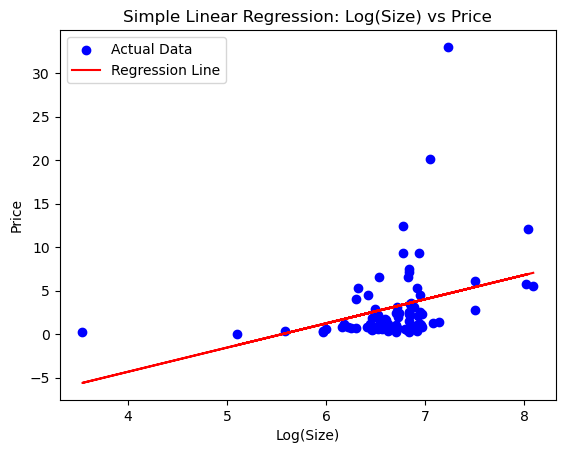

In [13]:
# Scatter plot and regression line for Task 1
plt.scatter(X1_test_log, y_test, color='blue', label='Actual Data')
plt.plot(X1_test_log, y_pred1, color='red', label='Regression Line')
plt.xlabel('Log(Size)')
plt.ylabel('Price')
plt.legend()
plt.title('Simple Linear Regression: Log(Size) vs Price')
plt.show()


In [14]:
# Calculate the error (Mean Squared Error)
mse1 = mean_squared_error(y_test, y_pred1)
print('Mean Squared Error for Model 1:', mse1)

Mean Squared Error for Model 1: 18.713358364452144


In [15]:
# Calculate the error (Root Mean Squared Error) and Mean Absolute Error for Model 1
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
mae1 = mean_absolute_error(y_test, y_pred1)
print('Root Mean Squared Error for Model 1:', rmse1)
print('Mean Absolute Error for Model 1:', mae1)


Root Mean Squared Error for Model 1: 4.325893938188053
Mean Absolute Error for Model 1: 2.554171636228392


In [16]:
# For model 1 we will define width as independant variable
X2 = monet_dataset[['WIDTH']]

In [17]:
# Split the data into training and testing sets
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)


In [18]:
# Logarithmic transformation for Task 1
X2_train_log = np.log(X2_train)
X2_test_log = np.log(X2_test)

In [19]:
#TASK 1: width as independant variable
# Train the model
model2 = LinearRegression()
model2.fit(X2_train_log, y_train)

LinearRegression()

In [20]:
# Make predictions
y_pred2 = model2.predict(X2_test_log)


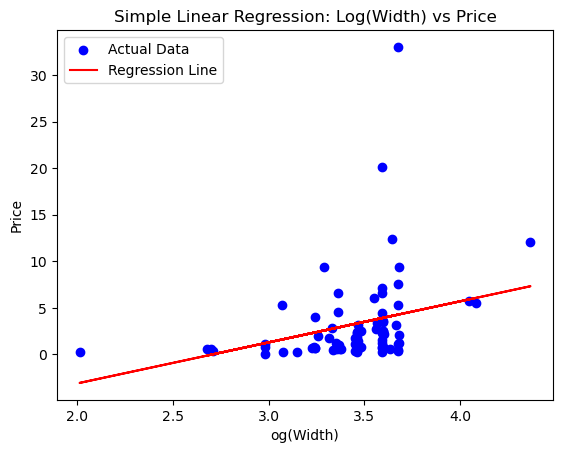

In [21]:
# Plot the scatter plot and regression line
plt.scatter(X2_test_log, y_test, color='blue', label='Actual Data')
plt.plot(X2_test_log, y_pred2, color='red', label='Regression Line')
plt.xlabel('og(Width)')
plt.ylabel('Price')
plt.legend()
plt.title('Simple Linear Regression: Log(Width) vs Price')
plt.show()

In [22]:
# Calculate the error (Mean Squared Error)
mse2 = mean_squared_error(y_test, y_pred2)
print('Mean Squared Error for Model 2:', mse2)

Mean Squared Error for Model 2: 18.983561995218633


In [23]:
# Calculate the error (Root Mean Squared Error) and Mean Absolute Error for Model 2
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
mae2 = mean_absolute_error(y_test, y_pred2)
print('Root Mean Squared Error for Model 2:', rmse2)
print('Mean Absolute Error for Model 2:', mae2)


Root Mean Squared Error for Model 2: 4.357012967070288
Mean Absolute Error for Model 2: 2.596446622241354


In [24]:
monet_dataset.columns

Index(['PRICE', 'HEIGHT', 'WIDTH', 'SIGNED', 'PICTURE', 'HOUSE', 'SIZE'], dtype='object')

In [25]:
#TASK 2
monet_dataset['SIZE'] = monet_dataset['HEIGHT'] * monet_dataset['WIDTH']


In [26]:
#For multi variate model
X_multivariate = monet_dataset[['HEIGHT', 'WIDTH', 'PICTURE', 'HOUSE']]
X_multivariate

,HEIGHT,WIDTH,PICTURE,HOUSE
0,21.3,25.6,1,1
1,31.9,25.6,2,2
2,6.9,15.9,3,3
3,25.7,32.0,4,2
4,25.7,32.0,4,2
...,...,...,...,...
425,25.6,39.4,375,1
426,25.9,39.6,375,2
427,25.6,39.6,375,1
428,25.6,39.4,386,2


In [27]:
y = monet_dataset['PRICE'] 

In [28]:
# Define independent and dependent variables for Task 2 (Multivariate)
X_multivariate = monet_dataset[['HEIGHT', 'WIDTH', 'PICTURE', 'HOUSE']]
y = monet_dataset['PRICE']

In [29]:
# Normalize the data for Task 2 (Multivariate)
scaler = StandardScaler()
X_multivariate_normalized = scaler.fit_transform(X_multivariate)


In [30]:
# Split the data for Task 2 (Multivariate)
X_multi_train, X_multi_test, y_train, y_test = train_test_split(X_multivariate_normalized, y, test_size=0.2, random_state=42)


In [31]:
# Train the multivariate model
model_multivariate = LinearRegression()
model_multivariate.fit(X_multi_train, y_train)


LinearRegression()

In [32]:
# Make predictions for Task 2 (Multivariate)
y_pred_multivariate = model_multivariate.predict(X_multi_test)


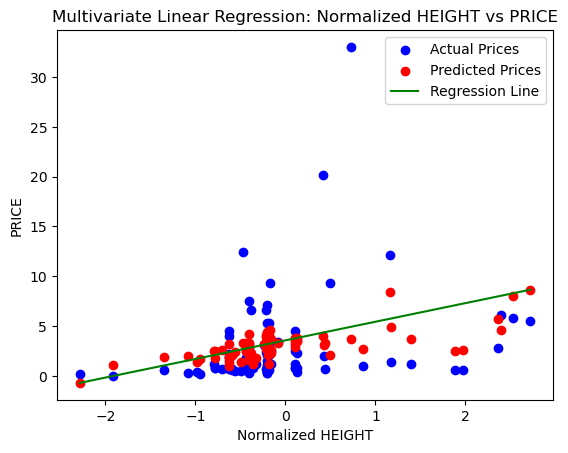

In [33]:
# Scatter plot for Task 2 (Multivariate) with straight regression line
plt.scatter(X_multi_test[:, 0], y_test, color='blue', label='Actual Prices')
plt.scatter(X_multi_test[:, 0], y_pred_multivariate, color='red', label='Predicted Prices')

# Plot a straight regression line
plt.plot([min(X_multi_test[:, 0]), max(X_multi_test[:, 0])], [min(y_pred_multivariate), max(y_pred_multivariate)], color='green', label='Regression Line')

plt.xlabel('Normalized HEIGHT')
plt.ylabel('PRICE')
plt.title('Multivariate Linear Regression: Normalized HEIGHT vs PRICE')
plt.legend()
plt.show()


In [34]:
# Calculate the error (Mean Squared Error) for Task 2 (Multivariate)
mse_multivariate = mean_squared_error(y_test, y_pred_multivariate)
print('Mean Squared Error for Multivariate Model:', mse_multivariate)

Mean Squared Error for Multivariate Model: 18.667237933594105


In [35]:
# Calculate the error (Root Mean Squared Error) and Mean Absolute Error for Multivariate Model
rmse_multivariate = np.sqrt(mean_squared_error(y_test, y_pred_multivariate))
mae_multivariate = mean_absolute_error(y_test, y_pred_multivariate)
print('Root Mean Squared Error for Multivariate Model:', rmse_multivariate)
print('Mean Absolute Error for Multivariate Model:', mae_multivariate)

Root Mean Squared Error for Multivariate Model: 4.32055990973324
Mean Absolute Error for Multivariate Model: 2.4016921273656213
